# Trabajo Práctico 1

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import pyproj
import shapely.wkt
import numpy as np

 # Glosario columnas

-  operation: tipo de operacion (venta)
-  property type: tipo de propiedad (house, PH, apartment, store)
-  place_name: localidad de la propiedad.
-  place_with_parent_names: localidad junto a provinca, pais.
-  country_name: pais donde se encuentra la propiedad.
-  state_name: provincia donde se encuentra la propiedad.
-  geonames_id: número de identificación en la base de datos GeoNames.
-  lat-lon: latitud y longitud juntos.
-  lat: latidud.
-  lon: longitud.
-  price: precio de la propiedad en relacion a su moneda.
-  currency: moneda en la que se encuentra valorizada la propiedad.
-  price_aprox_local_currency: precio aproximado en pesos de la propiedad.
-  price_aprox_usd: precio aproximado del inmueble en dólares.
-  surface_total_in_m2: superficie total del inmueble en metros cuadrados.
-  surface_covered_in_m2: superficie cubierta del inmueble en metros cuadrados.
-  price_usd_per_m2: precio en dólares del metro cuadrado vs total m2.
-  price_per_m2: precio, no se sabe en qué moneda.
-  floor: piso? no es claro, valores extraños.
-  rooms: cantidad de habitaciones.
-  expenses: valor de las expensas.
-  properati_url: url de la url de properati donde está publicado el inmueble.
-  description: descripción completa de todo el inmueble. Contiene información de todas las columnas y más.
-  title: título con el que se encuentra publicado. Aparece el tipo de propiedad, zona y alguna característica destacada como cantidad de ambientes.
-  image_thumbnail: fotos del inmueble.

# Leemos el dataset

In [2]:
data=pd.read_csv('./properatti.csv')

# Observamos las diferentes columnas, los tipos de datos y cuantos valores no nulos tienen


Luego de disponibilizar el data set comenzamos a observar la información que contiene y a efectuar una limpieza del dataset provisto.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [4]:
#El metodo describe arroja principalmente estadisticas descriptivas para columnas con datos cuantitativos, es por ello que vemos tan solo 14 columnas del dataset
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [5]:
#Tomamos una muestra para entender los valores del dataset
data.sample(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
66679,66679,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1ae6u_venta_depart...,Te invitamos a conocer: En barrio Nueva Córdob...,***Vivi en Nva Cba***,https://thumbs4.properati.com/5/AvbtpM1vhj2OJq...
11588,11588,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9893149,-57.5600139",-37.989315,...,NaN,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/16c39_venta_casa_m...,"CHALET A RECICLAR EN BARRIO FERROAUTOMOTORA, C...",OPORTUNIDAD CHALET A RECICLAR BARRIO FERROAUTO...,https://thumbs4.properati.com/6/ftf24ohXBlqS-c...
45026,45026,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,66.0,1710.526316,1969.696970,3.0,NaN,NaN,http://www.properati.com.ar/191rr_venta_depart...,Barrio Cerrado Santa Barbara - Complejo Laguna...,"Departamento 76m² con 2 Plantas, Argentina, Ca...",https://thumbs4.properati.com/6/GViwsbxB5bBKRK...
97898,97898,sell,apartment,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,NaN,NaN,...,41.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bkrh_venta_depart...,"Departamento de 2 ambs semipiso, con excelente...",Departamento - Castelar Norte,https://thumbs4.properati.com/3/wu4a8OJFD4E6jA...
105693,105693,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,NaN,NaN,...,277.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1bv3d_venta_casa_r...,CARACTERÍSTICAS Casa en 2 plantas de 277.00 m...,Casa - Centro Oeste,https://thumbs4.properati.com/8/qxJ3wkDE7xnaq9...
55661,55661,sell,apartment,Flores,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,3433918.0,"-34.6301094,-58.4638274",-34.630109,...,40.0,1673.913043,1925.000000,NaN,NaN,1800.0,http://www.properati.com.ar/19pfv_venta_depart...,CODIGO: 512-1788 ubicado en: PEDERNERA 65 1º B...,2 AMBIENTES FRENTE BALCON EN VENTA EN FLORES S...,https://thumbs4.properati.com/5/pEanR4MRYWKuYX...
2871,2871,sell,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Argentina,Bs.As. G.B.A. Zona Oeste,3433359.0,"-34.65702438,-58.67539597",-34.657024,...,89.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/15kml_venta_casa_i...,"Venta de Casa 3 AMBIENTES en Ituzaingó ,living...",U$D 115.000 - Casa en Venta - Bruselas 100,https://thumbs4.properati.com/6/Zxq5ShjjXPNCwQ...
83125,83125,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,200.0,NaN,1800.000000,NaN,NaN,NaN,http://www.properati.com.ar/1b04q_venta_casa_n...,Espectacular casa a estrenar en uno de los mej...,Espectacular casa a estrenar en Nordelta - Las...,https://thumbs4.properati.com/0/1ygUP1jm43QszV...
73515,73515,sell,apartment,Lanús,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,...,36.0,NaN,1638.888889,NaN,NaN,NaN,http://www.properati.com.ar/1ansz_venta_depart...,MONOAMBIENTE A ESTRENAR EN LANUS OESTE. A UNA ...,Departamento - Lanús Oeste,https://thumbs4.properati.com/5/GdNCVB4k0vmU69...
120823,120823,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,NaN,NaN,...,56.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cies_venta_depart...,Semipiso de 3 ambientes todo r...,Departamento - Caballito,https://thumbs4.properati.com/9/cErLO8B6Jy1IQU...


# EDA (Exploration Data Analysis)

Comenzamos a explorar los datos, abordaremos las diferentes columnas evaluando qué datos contiene, su veracidad y utilidad. En el caso de datos nulos evaluaremos la opción de completarlos con datos que se encuentren en otras partes del data set.

## Porcentaje por columna


In [6]:
#Porcentaje de nulls respecto al total del dataset por columna

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
floor,floor,93.483749
expenses,expenses,88.234615
rooms,rooms,60.905791
price_usd_per_m2,price_usd_per_m2,43.394654
lat-lon,lat-lon,42.525986
lat,lat,42.525986
lon,lon,42.525986
surface_total_in_m2,surface_total_in_m2,32.443491
price_per_m2,price_per_m2,27.686850
currency,currency,16.837981


In [7]:
# Verificamos que todas las operaciones sean de tipo "Venta" // Podemos descartar esta columna
data.operation.value_counts()

sell    121220
Name: operation, dtype: int64

## Dropeamos (descartamos) la columna operation porque tiene un solo valor

In [8]:
data.drop('operation',inplace=True, axis=1)

## Análisis columnas económicas

Price, Currency, Price_aprox_usd, Price_aprox_local_currency

Como decisión de negocios, decidimos usar valores de precio en dólares únicamente, por lo que estos son los que intentaremos completar y depurar.

In [9]:
#Cantidad de casos en que 'price' coincide con 'Price_aprox_usd'. Tenemos 87588 que coinciden.

sum(data.price == data.price_aprox_usd)

87588

In [10]:
#Cantidad de casos en que 'price' no coincide con 'Price_aprox_usd'. Tenemos 33632 que no coinciden.
sum(data.price != data.price_aprox_usd)

33632

In [11]:
#Cantidad de casos en que 'price' coincide con 'price_aprox_local_currency'
sum(data.price == data.price_aprox_local_currency)

1

In [12]:
#Es uno solo, así que veo cuál es:

data[data.price == data.price_aprox_local_currency][['price', 'currency', 'price_aprox_usd', 'price_aprox_local_currency']]

,price,currency,price_aprox_usd,price_aprox_local_currency
9761,0.0,NaN,0.0,0.0


In [13]:
#Corroboro que todos los 'price' cuya 'currency' es USD se correspondan con el 'price_aprox_usd'

data2 = data[data.currency == 'USD']

In [14]:
#Valido si hay algun precio que sea distinto
len(data2[data2.price != data2.price_aprox_usd])

0

In [15]:
#veo que hay uno menos que los coincidentes en valor(87588 vs 87587), alguno debe estar mal etiquetado, lo busco.
len(data2)

87587

In [16]:
data[(data.price == data.price_aprox_usd) & (data.currency != 'USD')][['price', 'currency', 'price_aprox_usd', 'price_aprox_local_currency']]

,price,currency,price_aprox_usd,price_aprox_local_currency
9761,0.0,NaN,0.0,0.0


In [17]:
#Ahora analizamos aquellos valores cuyos 'currency' no son USD.
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [18]:
data[['price_aprox_usd', 'price']][data.currency == 'PEN']

,price_aprox_usd,price
50387,117139.33,380000.0
50388,292848.33,950000.0


In [19]:
data[['price_aprox_usd', 'price']][data.currency == 'UYU']

,price_aprox_usd,price
107390,22980378.29,650000000.0


In [20]:
auxData = data['description']


In [21]:
auxData = auxData.str.upper()
auxData = auxData.str.replace('.','', regex=True)
auxData.fillna('', inplace = True)
auxData.head()

0    2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
1    VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...
2    2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3    PH 3 AMBIENTES CON PATIO HAY 3 DEPTOS EN LOTE,...
4    DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...
Name: description, dtype: object

In [22]:
auxData2 = auxData.str.extract('(USD|USS|US|U[$]D|U[$][$]|U[$]S)\s?(\d+)')
auxData2.head

<bound method NDFrame.head of           0      1
0       NaN    NaN
1       U$D  20000
2       NaN    NaN
3       NaN    NaN
4       NaN    NaN
...     ...    ...
121215  NaN    NaN
121216  NaN    NaN
121217  USD  20000
121218  U$S  95900
121219  NaN    NaN

[121220 rows x 2 columns]>

In [23]:
auxData2.columns=['USD', 'price']

In [24]:
auxData2.price.notnull().sum()

13039

In [25]:
#aplico al dataset
auxData2.price = pd.to_numeric(auxData2['price'])

In [26]:
data['price_aprox_usd'] = data['price_aprox_usd'].fillna(auxData2['price'])

In [27]:
data['price_aprox_usd'].isnull().sum()

19278

In [28]:
#regex para tittle
auxData3 = data['title']

In [29]:
# formateo auxData3 para el regex

auxData3 = auxData3.str.upper()
auxData3 = auxData3.str.replace('.', '', regex=True)
auxData3.fillna('', inplace=True)

In [30]:
# Extraccion
auxData4 = auxData3.str.extract('(USD|USS|US|U[$]D|U[$][$]|U[$]S)\s?(\d+)')

In [31]:
# Renombro columnas
auxData4.columns = ['USD', 'price']

In [32]:
# Tenemos 6948 precios que no son nulos
auxData4.price.notnull().sum()

6948

In [33]:
# paso a numero los precios
auxData4.price = pd.to_numeric(auxData4['price'])

In [34]:
#Se aplica al dataset
data['price_aprox_usd'] = data['price_aprox_usd'].fillna(auxData4['price'])

In [35]:
# Todavia tenemos 17102 valores nulos para price
data['price_aprox_usd'].isnull().sum()

17102

In [36]:
#Completamos hasta ahora 3308 vacíos, quedandonos con 17102 datos vacíos.

ymax: 129629628.45


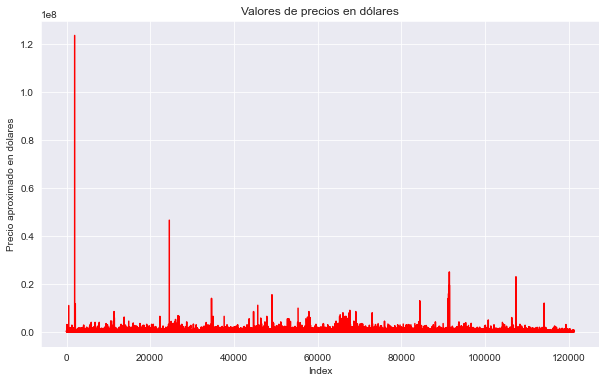

In [37]:
#Separo valores de precios muy extremos para revaluar con coherencia:

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(data.price_aprox_usd)), data.price_aprox_usd, color='red')

plt.xlabel('Index')
plt.ylabel('Precio aproximado en dólares')
plt.title('Valores de precios en dólares')

xmin, xmax, ymin, ymax = plt.axis()
print('ymax: %.2f'% ymax)

Vamos a analizar la columna que contiene el precio de la propiedad por m2

In [38]:
## precio por m2
data.price_usd_per_m2.describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

In [39]:

#Vemos los null
data.price_aprox_usd[data.price_aprox_usd.isnull()].index


Int64Index([     5,     20,     41,     62,     67,     76,     83,     84,
                85,    100,
            ...
            121126, 121127, 121129, 121142, 121207, 121208, 121210, 121211,
            121212, 121213],
           dtype='int64', length=17102)

In [40]:
len(data.price_aprox_usd[data.price_aprox_usd.isnull()].index)

17102

In [41]:
indices=data.price_usd_per_m2[data.price_usd_per_m2.isnull()].index
indices

Int64Index([     1,      3,      5,      9,     11,     20,     41,     62,
                65,     67,
            ...
            121152, 121155, 121156, 121207, 121208, 121210, 121211, 121212,
            121213, 121214],
           dtype='int64', length=52603)

In [42]:
len(data.price_usd_per_m2[data.price_usd_per_m2.isnull()].index)

52603

In [43]:
data.surface_total_in_m2[data.surface_total_in_m2.isnull()].index


Int64Index([     1,      3,      9,     11,     65,     68,     70,     71,
                72,     77,
            ...
            121148, 121149, 121150, 121151, 121152, 121155, 121156, 121207,
            121208, 121210],
           dtype='int64', length=39328)

In [44]:
len(data.surface_total_in_m2[data.surface_total_in_m2.isnull()].index)

39328

In [45]:
price_usd_per_m2_nuevo = data[['price_aprox_usd','surface_total_in_m2']]

price_usd_per_m2_nuevo = pd.DataFrame(price_usd_per_m2_nuevo.apply(lambda x: x['price_aprox_usd']/x['surface_total_in_m2'] 
                                   if(x['price_aprox_usd'] > 0 and x['surface_total_in_m2'] > 0 and x['price_aprox_usd'] > x['surface_total_in_m2']) 
                                   else np.nan, axis=1
                                  )
                     )

In [46]:
price_usd_per_m2_nuevo

,0
0,1127.272727
1,NaN
2,1309.090909
3,NaN
4,1828.571429
...,...
121215,7699.115044
121216,1383.333333
121217,2858.695652
121218,1997.916667


In [47]:
price_usd_per_m2_nuevo.mean()


0    2130.800129
dtype: float64

In [48]:
data.price_usd_per_m2.fillna(price_usd_per_m2_nuevo[0], inplace=True)


In [49]:
data.price_usd_per_m2.isnull().sum()


50222

Analizamos cómo fueron calculados los valores de precio por m2, para los datos que coinciden precio y precio_aprox_usd:

In [50]:
#total
data.loc[(data['price'] == data['price_aprox_usd'])].shape

(87588, 25)

In [51]:
#vacios
data.loc[(data['price'] == data['price_aprox_usd']) & (data['price_aprox_usd'].isnull())].shape

(0, 25)

In [52]:
#price usd o price y sup total (bien)

data.loc[(data['price'] == data['price_aprox_usd']) & (round(data['price_usd_per_m2'],2) == round((data['price_aprox_usd']/data['surface_total_in_m2']),2))].shape


(60133, 25)

In [53]:
##price usd o price y sup cubierta

data.loc[(data['price'] == data['price_aprox_usd']) & (round(data['price_usd_per_m2'],2) == round((data['price_aprox_usd']/data['surface_covered_in_m2']),2))].shape


(18400, 25)

Notamos que fueron calculados de diferenctes maneras y que también hay datos erróneos.

En todos los casos, reemplazamos la fórmula por la correcta:

In [54]:
data.price_usd_per_m2 = np.where((data['price'] != data['price_aprox_usd']) & (data['surface_total_in_m2'] != 0), data['price_aprox_usd']/data['surface_total_in_m2'], data['price_usd_per_m2'])


In [55]:
data.price_usd_per_m2 = np.where((data['price'] == data['price_aprox_usd'])  & (data['surface_total_in_m2'] != 0), data['price_aprox_usd']/data['surface_total_in_m2'], data['price_usd_per_m2'])


In [56]:
data.price_usd_per_m2.isnull().sum()


50010

In [57]:
# Confirmar, se hizo la media y se completaron los nan
data.price_usd_per_m2.fillna(data.groupby(['property_type', 'place_name'])['price_usd_per_m2'].transform('mean'), inplace=True)


In [58]:
data.price_usd_per_m2.isnull().sum()

1542

## Property Type

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64


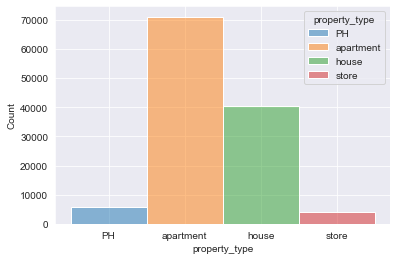

In [59]:
# Vemos 4 valores distintos de property_type. 
# La mayor cantidad de anuncios son de Apartment y House
print(data.property_type.value_counts())
sns.histplot( x="property_type", data=data, hue='property_type' )
plt.show()


In [60]:
# Valores de property_type
data.place_name.value_counts()

Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Sierras Bayas            1
Paso de los Libres       1
Azara                    1
Coronel Du Graty         1
Altos de Hudson I        1
Name: place_name, Length: 1060, dtype: int64

## Chequeamos si los valores de place_name coinciden con place_with_parent_names

In [61]:
# Chequeo si todos los place_names son correctos en place_with_parent_names
# 23 --> a 23 registros le falta el place name
place_coincide = data.apply(lambda x: True if str(x['place_with_parent_names']).find(str(x['place_name'])) >= 0 else False, axis=1)
place_coincide.value_counts()

True     121197
False        23
dtype: int64

In [62]:
print(data.loc[~place_coincide,['place_with_parent_names']])

                           place_with_parent_names
6489   |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14839  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
18622  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
21922  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
23664  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
24722  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
38856  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
45970  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
46642  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
53130  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
55306  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57703  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57759  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57764  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57793  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
58004  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
58037  |Argentina|Bs.As. G.B.A.

### Los que faltan son todos de Tigre

In [63]:

data.place_name.isnull().value_counts()

False    121197
True         23
Name: place_name, dtype: int64

## Imputamos los valores diferentes por Tigre


In [64]:
#Imputamos los valores faltantes en place_name con el Valor de Tigre.
data['place_name'] = data['place_name'].replace('nan', 'Tigre')

#Chequeamos los valores
place_coincide = data.apply(lambda x: True if str(x['place_with_parent_names']).find(str(x['place_name'])) >= 0 else False, axis=1)
place_coincide.value_counts()

mask= place_coincide== False
data[mask]

data.iloc[6489]

Unnamed: 0                                                                 6489
property_type                                                             house
place_name                                                                  NaN
place_with_parent_names             |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
country_name                                                          Argentina
state_name                                             Bs.As. G.B.A. Zona Norte
geonames_id                                                                 NaN
lat-lon                                             -34.4008968545,-58.63809847
lat                                                                  -34.400897
lon                                                                  -58.638098
price                                                                  650000.0
currency                                                                    USD
price_aprox_local_currency              

In [65]:
#Hay nombres de place_name que tiene espacios al principio/final del string
data['place_name'] = data['place_name'].apply(lambda x : str(x).strip())

## Chequeamos si los valores de state_name coinciden con place_with_parent_names


In [66]:
# Chequeo si todos los state_names son correctos en place_with_parent_names.
# 121220 --> Todos OK 
state_coincide = data.apply(lambda x: True if str(x['place_with_parent_names']).find(str(x['state_name'])) >= 0 else False, axis=1)
state_coincide.value_counts()

True    121220
dtype: int64

In [67]:
# Chequeo si todos los country_names son correctos en place_with_parent_names
# 121220 --> Todos OK 
country_coincide = data.apply(lambda x: True if str(x['place_with_parent_names']).find(str(x['country_name'])) >= 0 else False, axis=1)
country_coincide.value_counts()

True    121220
dtype: int64

In [68]:
#Verificamos los diferentes valores de country_name
data['country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

## Dropeamos country_name

In [69]:
#Drop country_name porque tiene un solo valor
data.drop('country_name', inplace=True, axis=1)

## State Name

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Name: state_name, dtype: int64


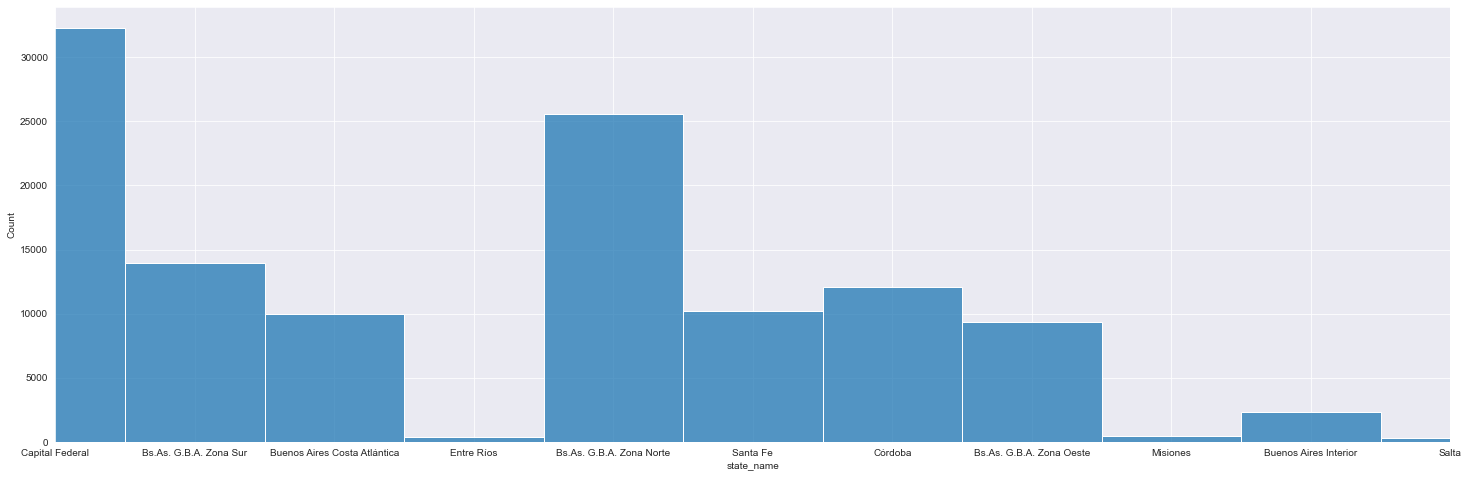

In [70]:
#Top 10 Provincias con mas propiedades
s= data.state_name.value_counts().nlargest(10)
print(s)
plt.figure(figsize=(25, 8))

#Histplot con propiedades por provincia
g =sns.histplot(x="state_name",  data=data)
g.set(xlim=(0,10))
plt.show()

## State Name // Group By

In [71]:
# Chequeo de la cantidad de publicaciones por state_name ordenada.

#data.columns
#data_grouped = data.groupby(['state_name'])
#display(data_grouped.describe().sort_values(by=('price_aprox_usd','count'), ascending=False)['price_aprox_usd'].round)
#data_grouped.describe().sort_values(by=('price_aprox_usd','count'), ascending=False)['price_aprox_usd'].round

# // Creo que lo de arriba puede ser reemplazable por la linea 9. Es mas prolijo y le agrega el valor de armarlo por property type.
# De todas maneras podriamos poner esto aparte ya que parece datos estadisticos y podria ir en otra seccion.

data.groupby(['state_name', 'property_type'])[['price_aprox_usd']].describe()



price_aprox_usd                 \
                                                 count           mean   
state_name               property_type                                  
Bs.As. G.B.A. Zona Norte PH                      978.0  136045.021789   
                         apartment             10419.0  198918.033440   
                         house                 13052.0  424355.059119   
                         store                   547.0  547507.330695   
Bs.As. G.B.A. Zona Oeste PH                      769.0  108863.509909   
...                                                ...            ...   
Tierra Del Fuego         store                     3.0  371514.630000   
Tucumán                  PH                        2.0   77675.885000   
                         apartment               141.0  140950.819078   
                         house                    61.0  218445.141803   
                         store                    10.0  168659.926000   

                                                                              \
                                                  std       min          25%   
state_name               property_type                                         
Bs.As. G.B.A. Zona Norte PH              68278.211861   5047.53   90000.0000   
                         apartment      207749.446227      1.00  110000.0000   
                         house          418151.568648      1.00  217000.0000   
                         store          974277.300217      1.00   98000.0000   
Bs.As. G.B.A. Zona Oeste PH              69347.217837      1.00   75000.0000   
...                                               ...       ...          ...   
Tierra Del Fuego         store          342156.549230  84125.51  182271.9450   
Tucumán                  PH              72572.582197  26359.32   52017.6025   
                         apartment      331839.520515  16719.77   61692.0400   
                         house          390074.332898  16916.52   72908.7700   
                         store          176861.139066   6383.89   45932.1475   

                                                                              
                                               50%          75%          max  
state_name               property_type                                        
Bs.As. G.B.A. Zona Norte PH             125000.000  165000.0000    680000.00  
                         apartment      155000.000  240000.0000  11800000.00  
                         house          328000.000  485000.0000  14000000.00  
                         store          250000.000  535000.0000  13000000.00  
Bs.As. G.B.A. Zona Oeste PH              95000.000  128000.0000    980000.00  
...                                            ...          ...          ...  
Tierra Del Fuego         store          280418.380  515209.1900    750000.00  
Tucumán                  PH              77675.885  103334.1675    128992.45  
                         apartment       84125.510  109363.1600   3300000.00  
                         house          112167.350  196292.8600   2500000.00  
                         store           91135.970  293668.1450    476711.25  

[98 rows x 8 columns]

## Currency

In [72]:
#Verificamos los valores de currency
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

## Tipo de Cambio

In [73]:
#Verificamos el tipo de cambio y si el price_aprox_usd es correcto con respecto al price_aprox_local_currency

data["tipo_de_cambio"]=round(data.price_aprox_local_currency/data.price_aprox_usd,2)
print(f'Desvío tipo de cambio= ', data.tipo_de_cambio.std())
print(data['tipo_de_cambio'].value_counts())
print(f'Tipo de cambio nulos: ', data.tipo_de_cambio.isnull().sum())


Desvío tipo de cambio=  3.487005770896986e-11
17.64    100809
Name: tipo_de_cambio, dtype: int64
Tipo de cambio nulos:  20411


# Analisis Estadistico Descriptivo

Realizamos un análisis descriptivo de las principales variables

## Price Aprox USD

In [74]:
#Quartiles para graficar outliers de Price aprox USD
data['price_aprox_usd'].quantile([.95, .98, .99, .995, .998])


0.950     698000.0
0.980    1150000.0
0.990    1500000.0
0.995    2000000.0
0.998    2850000.0
Name: price_aprox_usd, dtype: float64

<AxesSubplot:xlabel='property_type', ylabel='price_aprox_usd'>

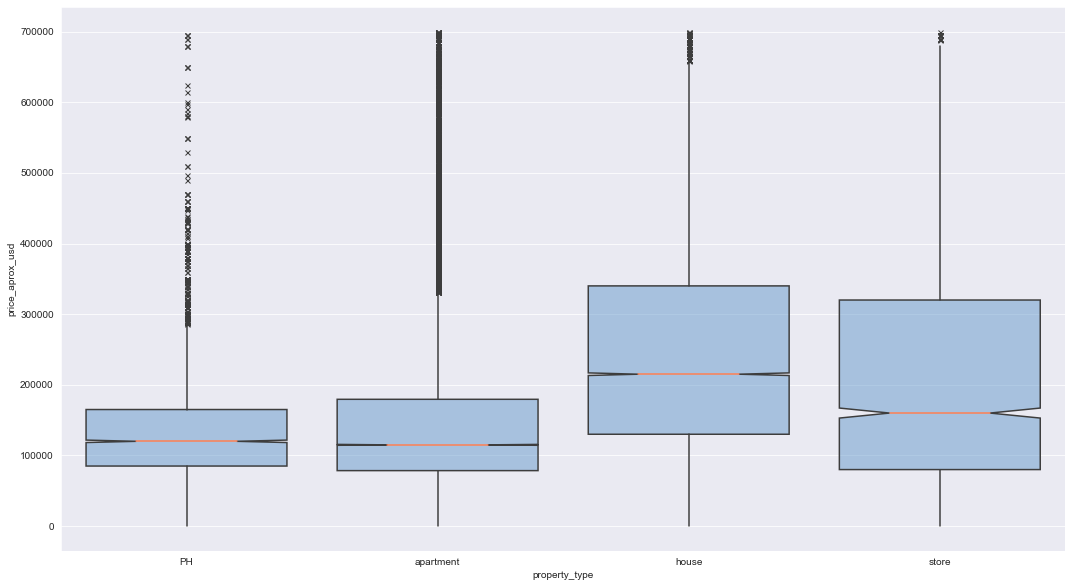

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(18, 10))
sns.boxplot(
    data=data, x="property_type", y=data[data['price_aprox_usd'] < 700000]['price_aprox_usd'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)


## Surface Aprox USD

In [76]:
#Quartiles para graficar surface total in m2
data['surface_total_in_m2'].quantile([.95, .98, .99, .995, .998])


0.950     704.450
0.980    1120.180
0.990    1700.000
0.995    2700.000
0.998    5732.924
Name: surface_total_in_m2, dtype: float64

<AxesSubplot:xlabel='property_type', ylabel='surface_total_in_m2'>

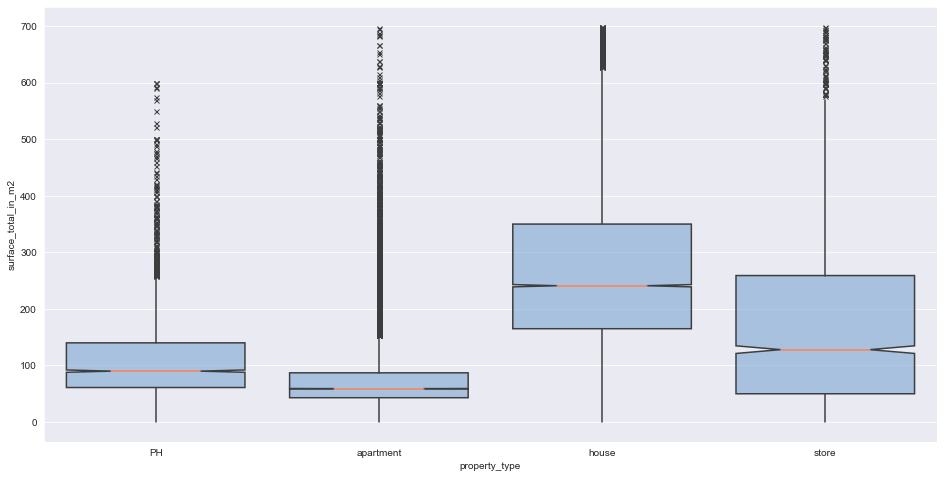

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 8))
sns.boxplot(
    data=data, x="property_type", y=data[data['surface_total_in_m2'] < 700]['surface_total_in_m2'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)


## Top 10 StateName por propiedades

['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Córdoba', 'Santa Fe', 'Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior', 'Río Negro', 'Neuquén']
Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Name: state_name, dtype: int64


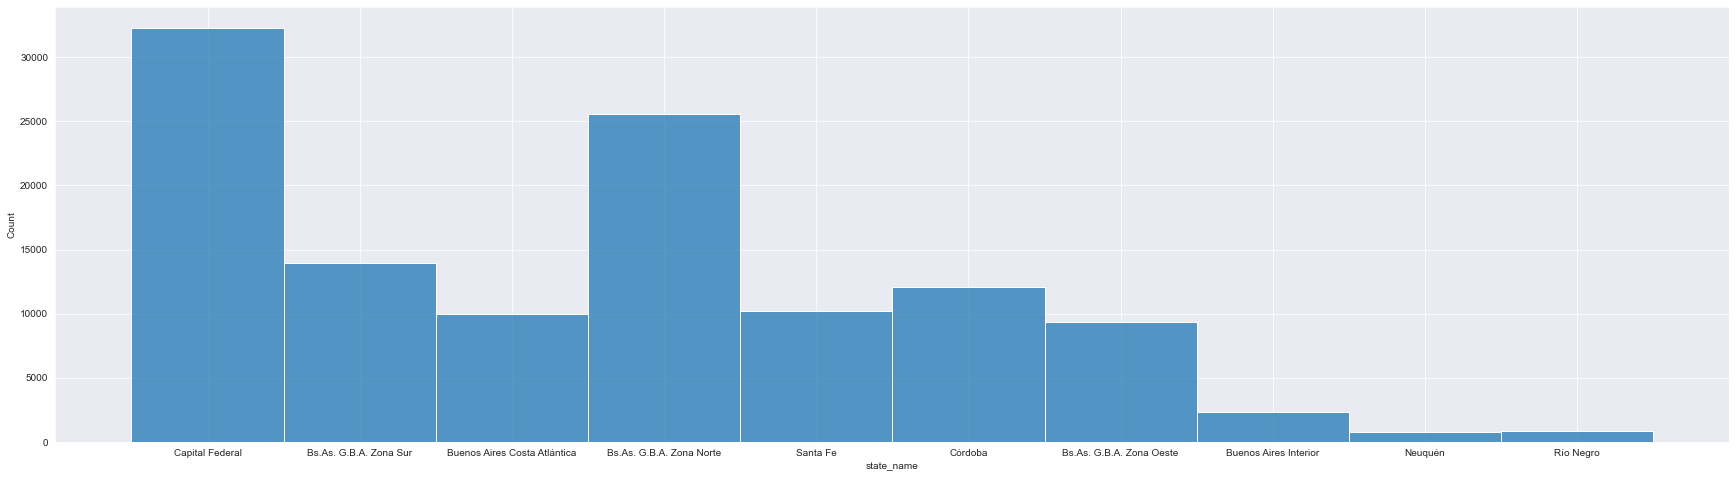

In [78]:
#Top 10 filtro para State Name grafico 10 provincias con mayor cantidad de propiedades
mask_100_state_name =data.state_name.value_counts().nlargest(10)

list=[]
for i in mask_100_state_name.items():
    list.append(i[0])
print(list)


mask_list=data.state_name.isin(list)

plt.figure(figsize=(30, 8))
sns.histplot(
    data=data[mask_list], x="state_name", stat='count'
)

print(data.state_name.value_counts().nlargest(10))
#data.state_name.unique()

<AxesSubplot:xlabel='property_type', ylabel='price_aprox_usd'>

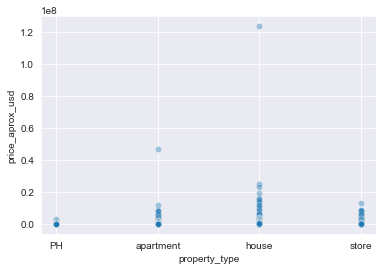

In [79]:
#Graficamos por property type y price_aprox_usd
#Pareceria haber outliers en Apartments > 4, houses > 2 y stores > 1
sns.scatterplot(data=data, x='property_type', y="price_aprox_usd", alpha=0.4)

<AxesSubplot:xlabel='property_type', ylabel='surface_total_in_m2'>

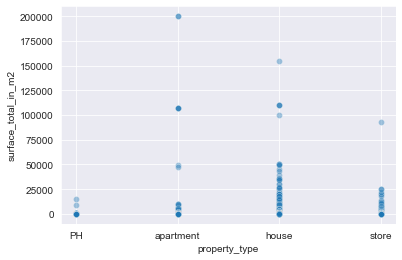

In [80]:
#Graficamos por property type y surface_total_in_m2
#Pareceria haber outliers en Apartments > 25000, houses > 100000 y stores > 75000
sns.scatterplot(data=data, x='property_type', y="surface_total_in_m2", alpha=0.4)

<AxesSubplot:xlabel='property_type', ylabel='surface_covered_in_m2'>

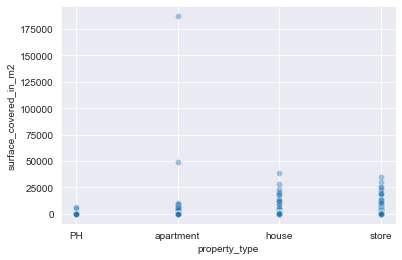

In [81]:
#Graficamos por property type y surface_covered_in_m2
#Pareceria haber outliers en Apartments > 50000
sns.scatterplot(data=data, x='property_type', y="surface_covered_in_m2", alpha=0.4)

## Correlacion entre Expensas, Superficie total y Precio por M2 (Capital Federal)

<AxesSubplot:xlabel='expenses', ylabel='price_aprox_usd'>

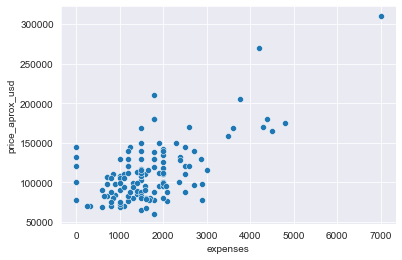

In [82]:
data_deptos_40=(data.surface_covered_in_m2==40)&(data.property_type=="apartment")&(data.state_name=="Capital Federal")
data[data_deptos_40]
sns.scatterplot(data=data[data_deptos_40],x="expenses",y="price_aprox_usd")

<AxesSubplot:xlabel='expenses', ylabel='price_aprox_usd'>

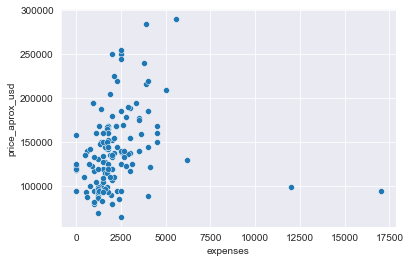

In [83]:
data_deptos_50=(data.surface_covered_in_m2==50)&(data.property_type=="apartment")&(data.state_name=="Capital Federal")
data[data_deptos_50]
sns.scatterplot(data=data[data_deptos_50],x="expenses",y="price_aprox_usd")

<AxesSubplot:xlabel='expenses', ylabel='price_aprox_usd'>

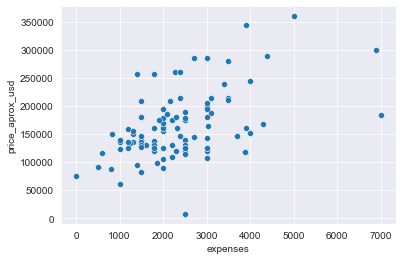

In [84]:
data_deptos_60=(data.surface_covered_in_m2==60)&(data.property_type=="apartment")&(data.state_name=="Capital Federal")
data[data_deptos_60]
sns.scatterplot(data=data[data_deptos_60],x="expenses",y="price_aprox_usd")

In [85]:
#SUMAR GRAFICOS ELEONORA DE AMBIENTES Y M2

In [86]:
#Prodiamos dropear las siguientes columnas porque no agregan valor
#image_thumbnail 
#properati_url

## Lat - Lon: Datos geoespaciales


Tomando los valores de las columnas latitud y longitud para hacer un análisis geo espacial de los datos, viendo dónde se encuentran ubicadas las propiedades en la Argentina y luego cómo es su distribución en Capital Federal.

### Argentina


In [87]:
geometria_data = gpd.points_from_xy(data['lon'], data['lat'])
data_geo=gpd.GeoDataFrame(data, geometry=geometria_data)

In [88]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: dlopen(/Users/juanmartingarcia/opt/anaconda3/lib/python3.9/site-packages/fiona/ogrext.cpython-39-darwin.so, 0x0002): Library not loaded: '@rpath/libpoppler.91.dylib'
  Referenced from: '/Users/juanmartingarcia/opt/anaconda3/lib/libgdal.30.dylib'
  Reason: tried: '/Users/juanmartingarcia/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/Users/juanmartingarcia/opt/anaconda3/lib/python3.9/site-packages/fiona/../../../libpoppler.91.dylib' (no such file), '/Users/juanmartingarcia/opt/anaconda3/lib/python3.9/site-packages/fiona/../../../libpoppler.91.dylib' (no such file), '/Users/juanmartingarcia/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/Users/juanmartingarcia/opt/anaconda3/bin/../lib/libpoppler.91.dylib' (no such file), '/Users/juanmartingarcia/opt/anaconda3/lib/libpoppler.91.dylib' (no such file), '/Users/juanmartingarcia/opt/anaconda3/bin/../lib/libpoppler.91.dylib' (no such file), '/usr/local/lib/libpoppler.91.dylib' (no such file), '/usr/lib/libpoppler.91.dylib' (no such file)
Importing pyogrio resulted in: No module named 'pyogrio'

In [ ]:
arg = world[world.name == 'Argentina']
arg.head(3)

In [ ]:
data_geo['is_in_arg'] = data_geo['geometry'].apply(lambda x: arg.iloc[0]['geometry'].contains(x))
data_geo['is_in_arg'].value_counts()

In [ ]:
# Mapa de Argentina
ax = arg.plot(color='white', edgecolor='black')

# Propiedades
data_geo.loc[data_geo.is_in_arg==True].plot(ax=ax, color='blue', markersize=0.50)

plt.show()

### Capital Federal

Tomamos un archivo con los datos correspondientes a las comunas de CABA para así ver la distribución espacial de las propiedades.

In [ ]:
barrios = pd.read_csv("./barrios.csv", encoding='latin1')
barrios.head()

In [ ]:
barrios["WKT"] = barrios["WKT"].apply(shapely.wkt.loads) 
geo_barrios = gpd.GeoDataFrame(barrios, geometry='WKT')

In [ ]:
geo_barrios.plot()

In [ ]:
capital_federal_completo = data.loc[data.state_name.str.contains('Capital Federal') == True]
capital_federal = capital_federal_completo.loc[(capital_federal_completo.lat > -35) & (capital_federal_completo.lon > -60), :]

#capital_federal.info()
#capital_federal_1.info()

print(len(capital_federal))
print(len(capital_federal_completo))

In [ ]:
geometria = gpd.points_from_xy(capital_federal['lon'], capital_federal['lat'])

In [ ]:
capital_federal_geo=gpd.GeoDataFrame(capital_federal, geometry=geometria)

capital_federal_geo.crs = {'init' :'epsg:4326'}

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
capital_federal_geo.plot(ax=ax, color='red',markersize=0.25)
plt.show();

Incluimos una nueva base de datos que contiene las estaciones de subte de la ciudad con su información georeferenciada.

In [ ]:
data_location = "./estaciones-de-subte.csv"

df_subte = pd.read_csv(data_location, sep=',')

geometria = gpd.points_from_xy(df_subte.long, df_subte.lat)

geo_subte = gpd.GeoDataFrame(df_subte ,geometry=geometria)

geo_subte.plot()

Graficamos las propiedades y las estaciones de subte en la Ciudad Autónoma de Buenos Aires para ver cual es la distribución y su proximidad con alguna estación de subte.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_aspect('equal')
geo_barrios.plot(ax=ax, color='white', edgecolor='black')
capital_federal_geo.plot(ax=ax, color='red',markersize=0.25)
geo_subte.plot(ax=ax, color='blue',markersize=15)
plt.show();

Calculamos la distancia que tiene cada propiedad con la estación de subte más cercana.

In [ ]:
def calculate_distance_min(p,geo_subte):
    distances = geo_subte.distance(p.geometry)
    return distances.min()


In [ ]:
capital_federal_geo['distancia_subte_km']= capital_federal_geo.apply(lambda x: calculate_distance_min(x, geo_subte), axis=1)

In [ ]:
print(capital_federal_geo['distancia_subte_km'])

Evaluamos si hay relación entre el precio del metro cuadrado de la propiedad con la cercanía que tiene a una estación de subte.

In [ ]:
capital_federal_geo[["price_usd_per_m2", "distancia_subte_km"]].plot(kind='scatter', y="price_usd_per_m2", x="distancia_subte_km", figsize=(12, 10), alpha=0.5)
plt.ylim((0,20000))
plt.ylabel('Precio en dolares por metro cuadrado',size=8.0,labelpad=20.0)
plt.xlabel('Distancia al subte en kilómetros', size=8.0,labelpad=20.0)
plt.grid(True)
plt.suptitle('Precio del m2 según la distancia al subte')

# Conclusiones

El dataset posee columnas de tipo numericas (float) y cadena de caracteres (string). En lineas generales pudimos observar que el 60% de las columnas poseen datos faltantes, teniendo alguna de ellas con mas del 80% de los valores nulls, las columnas más datos tienen hacen a las dimensiones del dataset, como state_name, place_name, property_type, operation, title, etc.

Como el objetivo es realizar un modelo de regresion lineal que predijera el precio de las propiedades, la falta de datos numericos en relacion al precio afecta al modelo. Por ese motivo es que el EDA (Exploration Data Analysis) fue principalmente enfocado en las columnas numericas, sobretodo con enfoque en las columnas en relacion al precio por propiedad.

Como parte del trabajo de exploracion, comparamos aquellas columnas que en primer lugar parecieran compartir un mismo valor (por ejemplo place_name, place_with_parent_name) o (price, price_aprox_usd) e imputamos aquellos valores que existian en una columna y no en otra. Tambien utilizamos metodos estadisticos nativos de numpy y pandas para arrojar rapidamente metricas estadisticas de las colmunas numericas, como ".describe()"

Por otro lado, para poder imputar los distintos registros nulos que consideramos importantes para entrenar posteriormente el modelo, utilizamos principalmente la herramienta REGEX, sustrayendo valores de precio, expensas, cantidad de habitaciones, de la columna descripcion.

Por ultimo en la etapa de Analisis Estadistico Descriptivo tomamos como iniciativa utilizar la libreria seaborn y matplotlib, con estas pudimos rapidamente visualizar outliers, distribuciones geograficas, correlaciones, etc. Como conclusiones generales pudimos observar que existe una correlacion entre el precio por m2 y la distancia al subte, por otro lado tambien observamos que en departamentos de ciertas dimensiones existe una relacion entre precio aproximado en dolares y expensas.

